# Text generator using marcov chains

## Definition:

### n-gram: A sequence of characters/words with length n.
### Examples:
### "Hello world, my name is Saed and I am 30 years old"
### A 3-gram from the above string could be:
### "Hel", "nam", "cou", "my ", "Sae"
### OR : "my name is", "I am 30", "30 years old","Saed and I"

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

# Make the text.. some of shakespeare's..

In [2]:
text='Knowing that Mrs. Mallard was afflicted with a heart trouble, great care was taken to break to her as gently as possible the news of her husbands death. It was her sister Josephine who told her, in broken sentences; veiled hints that revealed in half concealing. Her husbands friend Richards was there, too, near her. It was he who had been in the newspaper office when intelligence of the railroad disaster was received, with Brently Mallards name leading the list of "killed." He had only taken the time to assure himself of its truth by a second telegram, and had hastened to forestall any less careful, less tender friend in bearing the sad message. She did not hear the story as many women have heard the same, with a paralyzed inability to accept its significance. She wept at once, with sudden, wild abandonment, in her sisters arms. When the storm of grief had spent itself she went away to her room alone. She would have no one follow her. There stood, facing the open window, a comfortable, roomy armchair. Into this she sank, pressed down by a physical exhaustion that haunted her body and seemed to reach into her soul. She could see in the open square before her house the tops of trees that were all aquiver with the new spring life. The delicious breath of rain was in the air. In the street below a peddler was crying his wares. The notes of a distant song which some one was singing reached her faintly, and countless sparrows were twittering in the eaves. There were patches of blue sky showing here and there through the clouds that had met and piled one above the other in the west facing her window. She sat with her head thrown back upon the cushion of the chair, quite motionless, except when a sob came up into her throat and shook her, as a child who has cried itself to sleep continues to sob in its dreams. She was young, with a fair, calm face, whose lines bespoke repression and even a certain strength. But now there was a dull stare in her eyes, whose gaze was fixed away off yonder on one of those patches of blue sky. It was not a glance of reflection, but rather indicated a suspension of intelligent thought. There was something coming to her and she was waiting for it, fearfully. What was it? She did not know; it was too subtle and elusive to name. But she felt it, creeping out of the sky, reaching toward her through the sounds, the scents, the color that filled the air. Now her bosom rose and fell tumultuously. She was beginning to recognize this thing that was approaching to possess her, and she was striving to beat it back with her will--as powerless as her two white slender hands would have been. When she abandoned herself a little whispered word escaped her slightly parted lips. She said it over and over under hte breath: "free, free, free!" The vacant stare and the look of terror that had followed it went from her eyes. They stayed keen and bright. Her pulses beat fast, and the coursing blood warmed and relaxed every inch of her body. She did not stop to ask if it were or were not a monstrous joy that held her. A clear and exalted perception enabled her to dismiss the suggestion as trivial. She knew that she would weep again when she saw the kind, tender hands folded in death; the face that had never looked save with love upon her, fixed and gray and dead. But she saw beyond that bitter moment a long procession of years to come that would belong to her absolutely. And she opened and spread her arms out to them in welcome. There would be no one to live for during those coming years; she would live for herself. There would be no powerful will bending hers in that blind persistence with which men and women believe they have a right to impose a private will upon a fellow-creature. A kind intention or a cruel intention made the act seem no less a crime as she looked upon it in that brief moment of illumination. And yet she had loved him--sometimes. Often she had not. What did it matter! What could love, the unsolved mystery, count for in the face of this possession of self-assertion which she suddenly recognized as the strongest impulse of her being! "Free! Body and soul free!" she kept whispering. Josephine was kneeling before the closed door with her lips to the keyhold, imploring for admission. "Louise, open the door! I beg; open the door--you will make yourself ill. What are you doing, Louise? For heavens sake open the door."  "Go away. I am not making myself ill." No; she was drinking in a very elixir of life through that open window. Her fancy was running riot along those days ahead of her. Spring days, and summer days, and all sorts of days that would be her own. She breathed a quick prayer that life might be long. It was only yesterday she had thought with a shudder that life might be long. She arose at length and opened the door to her sisters importunities. There was a feverish triumph in her eyes, and she carried herself unwittingly like a goddess of Victory. She clasped her sisters waist, and together they descended the stairs. Richards stood waiting for them at the bottom. Some one was opening the front door with a latchkey. It was Brently Mallard who entered, a little travel-stained, composedly carrying his grip-sack and umbrella. He had been far from the scene of the accident, and did not even know there had been one. He stood amazed at Josephines piercing cry; at Richards quick motion to screen him from the view of his wife. When the doctors came they said she had died of heart disease--of the joy that kills.'

# Get the n-grams table

In [3]:
def getnGrams(n,Nlength,text): 
    ngrams={}
    for i in range(len(text)-n):
        gram=text[i:i+n]
        if gram not in ngrams:
            ngrams[gram]=[]
        ngrams[gram].append(text[i+n:i+n+Nlength])
    return ngrams

In [4]:
nGrams=getnGrams(3,1,text)
head=10
print('First '+str(head)+' ngrams:')
for key, value in nGrams.items():
    print(key, ' : ', value)
    if(head==0):
        break
    head=head-1

First 10 ngrams:
Kno  :  ['w']
now  :  ['i', ' ', ';', ' ']
owi  :  ['n', 'n']
win  :  ['g', 'd', 'g', 'd', 'd']
ing  :  [' ', '.', ' ', ' ', ' ', ' ', ' ', 'i', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '!', '.', ' ', ' ', ',', ' ', ' ', ' ', ' ', 'l', ' ', ' ', ' ', ' ']
ng   :  ['t', 't', 't', 't', 'l', 'h', 'w', 'r', 'i', 'h', 'h', 'c', 't', 'f', 'o', 't', 't', 't', 't', 't', 'b', 'p', 't', 't', 'y', 'h', 'b', 'f', 'm', 'i', 'r', 't', 'd', 'f', 't', 'h', 'c']
g t  :  ['h', 'h', 'h', 'h', 'o', 'o', 'o', 'h', 'o', 'o', 'o', 'h', 'h', 'h']
 th  :  ['a', 'e', 'a', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'i', 'a', 'e', 'e', 'a', 'e', 'e', 'e', 'e', 'e', 'r', 'e', 'a', 'e', 'e', 'r', 'e', 'e', 'r', 'e', 'o', 'o', 'e', 'r', 'e', 'e', 'e', 'a', 'e', 'i', 'i', 'a', 'e', 'a', 'e', 'a', 'e', 'a', 'e', 'e', 'a', 'a', 'a', 'e', 'o', 'a', 'e', 'e', 'a', 'e', 'e', 'i', 'e', 'e', 'e', 'e', 'e', 'e', 'r', 'a', 'o', 'a', 'a', 'o', 'a', 'e', 'e', '

In [5]:
text="Late at night, guards on the battlements of Denmark's Elsinore castle are met by Horatio, Prince Hamlet's friend from school. The guards describe a ghost they have seen that resembles Hamlet's father, the recently-deceased king. At that moment, the Ghost reappears, and the guards and Horatio decide to tell Hamlet. Claudius, Hamlet's uncle, married Hamlet's recently-widowed mother, becoming the new King of Denmark. Hamlet continues to mourn for his father's death and laments his mother's lack of loyalty. When Hamlet hears of the Ghost from Horatio, he wants to see it for himself.  Elsewhere, the royal attendant Polonius says farewell to his son Laertes, who is departing for France. Laertes warns his sister, Ophelia, away from Hamlet and thinking too much of his attentions towards her.  The Ghost appears to Hamlet, claiming indeed to be the ghost of his father. He tells Hamlet about how Claudius, the current King and Hamlet's uncle, murdered him, and Hamlet swears vengeance for his father. Hamlet decides to feign madness while he tests the truth of the Ghost's allegations. According to his plan, Hamlet begins to act strangely. He rejects Ophelia, while Claudius and Polonius, the royal attendant, spy on him. They had hoped to find the reason for Hamlet's sudden change in behaviour but could not. Claudius summons Guildenstern and Rosencrantz, old friends of Hamlet to find out what's got into him. Their arrival coincides with a group of travelling actors that Hamlet happens to know well. Hamlet writes a play which includes scenes that mimic the murder of Hamlet's father. During rehearsal, Hamlet and the actors plot to present Hamlet's play before the King and Queen.   At the performance, Hamlet watches Claudius closely to see how he reacts. The play provokes Claudius, and he interrupts the action by storming out. He immediately resolves to send Hamlet away. Hamlet is summoned by his distressed mother, Gertrude, and on the way, he happens upon Claudius kneeling and attempting to pray. Hamlet reasons that to kill the King now would only send his soul to heaven rather than hell. Hamlet decides to spare his life for the time being.   Polonius hides in Gertrude's room to protect her from her unpredicatable son. When Hamlet arrives to scold his mother, he hears Polonius moving behind the arras (a kind of tapestry). He stabs the tapestry and, in so doing, kills Polonius. The ghost of Hamlet's father reappears and warns his son not to delay revenge or upset his mother.  Hamlet is sent to England, supposedly as an ambassador, just as King Fortinbras of Norway crosses Denmark with an army to attack Poland. During his journey, Hamlet discovers Claudius has a plan to have him killed once he arrives. He returns to Denmark alone, sending his companions Rosencrantz and Guildenstern to their deaths in his place.  Rejected by Hamlet, Ophelia is now desolate at the loss of her father. She goes mad and drowns.  On the way back to Denmark, Hamlet meets Horatio in the graveyard (along with a gravedigger), where they talk of the chances of life and death. Ophelia's funeral procession arrives at the very same graveyard (what luck!). Hamlet confronts Laertes, Ophelia's brother, who has taken his father's place at the court.  A duel is arranged between Hamlet and Laertes. During the match, Claudius conspires with Laertes to kill Hamlet. They plan that Hamlet will die either on a poisoned rapier or with poisoned wine. The plans go awry when Gertrude unwittingly drinks from the poisoned cup and dies. Then both Laertes and Hamlet are wounded by the poisoned blade, and Laertes dies.  Hamlet, in his death throes, kills Claudius. Hamlet dies, leaving only his friend Horatio to explain the truth to the new king, Fortinbras, as he returns in victory from the Polish wars."
text=text+"On a bleak Scottish moorland, Macbeth and Banquo, two of King Duncan's generals, discover three strange women (witches). The witches prophesy that Macbeth will be promoted twice: to Thane of Cawdor (a rank of the aristocracy bestowed by grateful kings) and King of Scotland. Banquo's descendants will be kings, but Banquo isn't promised any kingdom himself."
text=text+'The generals want to hear more, but the "weird sisters" disappear. '
text=text+"Soon afterwards, King Duncan names Macbeth Thane of Cawdor as a reward for his success in the recent battles. The promotion seems to support the prophecy. The King then proposes to make a brief visit that night to Macbeth's castle at Inverness. Lady Macbeth receives news from her husband about the prophecy and his new title. She vows to help him become king by whatever means are necessary (*ominous music*). "
text=text+"Macbeth returns to his castle, followed almost immediately by King Duncan. The Macbeths plot together to kill Duncan and wait until everyone is asleep. At the appointed time, Lady Macbeth gives the guards drugged wine so Macbeth can enter and kill the King. He regrets this almost immediately, but his wife reassures him. She leaves the bloody daggers by the dead king just before Macduff, a nobleman, arrives. When Macduff discovers the murder, Macbeth kills the drunken guards in a show of rage and retribution. Duncan's sons, Malcolm and Donalbain, flee, fearing for their own lives; but they are, nevertheless, blamed for the murder. "
text=text+"Macbeth becomes King of Scotland but is plagued by feelings of insecurity. He remembers the prophecy that Banquo's descendants will inherit the throne and arranges for Banquo and his son Fleance to be killed. In the darkness, Banquo is murdered, but his son escapes the assassins. At his state banquet that night, Macbeth sees the ghost of Banquo and worries the courtiers with his mad response. Lady Macbeth dismisses the court and unsuccessfully tries to calm her husband."
text=text+"Macbeth seeks out the witches who say that he will be safe until a local wood, Birnam Wood, marches into battle against him. He also need not fear anyone born of woman (that sounds secure, no loop-holes here). They also prophesy that the Scottish succession will still come from Banquo's son. Macbeth embarks on a reign of terror, slaughtering many, including Macduff's family. Macduff had gone to seek Malcolm (one of Duncan's sons who fled) at the court of the English king. Malcolm is young and unsure of himself, but Macduff, pained with grief, persuades him to lead an army against Macbeth."
text=text+"Macbeth feels safe in his remote castle at Dunsinane until he is told that Birnam Wood is moving towards him. Malcolm's army is carrying branches from the forest as camouflage for their assault on Macbeth's stronghold. Meanwhile, an overwrought and conscience-ridden Lady Macbeth walks in her sleep and tells her secrets to her doctor. She commits suicide. As the final battle commences, Macbeth hears of Lady Macbeth's suicide and mourns."

# Generate a random text by markov chain

In [6]:
def getMarkovChainedText(ngramsvec,n,text,expected):
    currGram=expected[0:n]
    res=currGram
    for i in range(len(expected)-n):
        if currGram not in ngramsvec:
            break;
        possibilities=ngramsvec[currGram]
        nextS=random.choice(possibilities)
        res=res+nextS
        length=len(res)
        currGram=res[length-n:length]
    return res

In [7]:
def hasNgram(key_search, ngrams):
    for key, value in ngrams.items():
        if(len(key)<len(key_search)):
            key_search=key_search[1:len(key)]
        if(key_search==key):
            return True
    return False

In [8]:
def evaluate(expected,actual):
    c=0
    for i in range(len(actual)):
        if(expected[0:i]==actual[0:i]):
            c+=1
        else:
            break;
    return c/len(actual)*1.0

In [9]:
def getTrainingGraph():
#     key_search=input('enter a text to start:')
    expected=input('Enter text you would like to generate: ')
    print(expected)
    
    ns=np.linspace(1,10,10)
    Nlengths=np.linspace(1,10,10)
    best=[]
    nBest=[]
    lngthBest=[]
    texts=[]
    for n in ns:
        for currLen in Nlengths:
            nGrams=getnGrams(int(n),int(currLen),text)
            #             if(hasNgram(key_search, nGrams)):
            res=getMarkovChainedText(nGrams,int(n),text,expected)
            ev=evaluate(res,expected)
            #             print(ev)
            if(len(best)==0):
                best.append(ev)
                nBest.append(n)
                lngthBest.append(currLen)
                texts.append(res)
            elif(ev>best[len(best)-1]):
                best.append(ev)
                nBest.append(n)
                lngthBest.append(currLen)
                texts.append(res)
    return best, nBest,lngthBest, texts

In [18]:
best, nBest, lngthBest, texts=getTrainingGraph()
#try: At the appointed time

Enter text you would like to generate: At the appointed time
At the appointed time


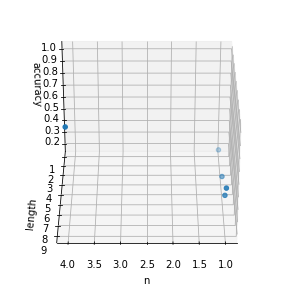

In [19]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(nBest,lngthBest,best)
ax.set_xlabel('n')
ax.set_ylabel('length')
ax.set_zlabel('accuracy')
angle=90
ax.view_init(30, angle)
plt.show()

Text(0.5, 0, 'n value')

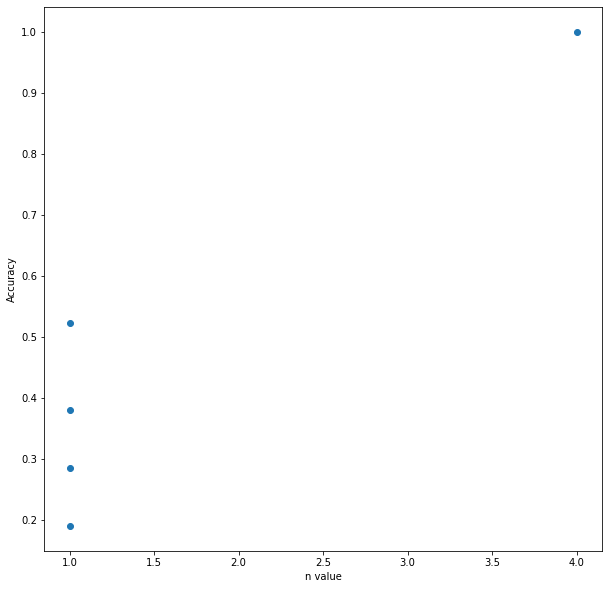

In [20]:
fig2=plt.figure(figsize=(10, 10))
ax2=plt.scatter(nBest,best)
plt.ylabel('Accuracy')
plt.xlabel('n value')

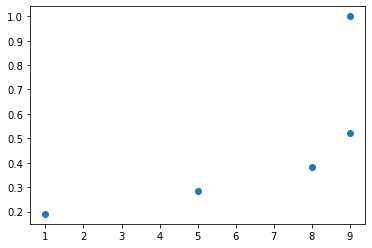

In [21]:
ax3=plt.scatter(lngthBest,best)

In [22]:
print('best res: '+str(best))
print('n values: '+str(nBest))
print('lengths: '+str(lngthBest))

best res: [0.19047619047619047, 0.2857142857142857, 0.38095238095238093, 0.5238095238095238, 1.0]
n values: [1.0, 1.0, 1.0, 1.0, 4.0]
lengths: [1.0, 5.0, 8.0, 9.0, 9.0]


In [23]:
i=1
print(best[len(best)-i],', n = ',nBest[len(best)-i],', length = ',lngthBest[len(best)-i],'\n text: '+texts[len(best)-i])


1.0 , n =  4.0 , length =  9.0 
 text: At the appointed time, Lady Macbeth kill the King Duncan's sons, Macbeth and Banquo, two of King Duncan's generals, discovers the dead kingdom himself, but M


In [24]:
# note that not all the predicted text is as the actual text...
# At the appointed time, Lady Macbeth gives the guards drugged wine so Macbeth can enter and kill the King.